### Kolmogorov-Arnold表示定理
Kolmogorov-Arnold表示定理指的是，每个多元连续函数可以表示为有限个一元连续函数的叠加
（ref: https://zhuanlan.zhihu.com/p/697354761）

$ f(x,y) = xy = exp(log x + log y) $

$ f(x,y,z) = x^y/z = exp（exp（log y + log log x） + （-log z）） $


#### *Kolmogorov-Arnold表示定理的理解上关键点：*

- 连续：对函数上任意一点，无论从哪个方向去逼近，值都是相等的；
  - 多元函数（拟合的目标函数）是连续的；
  - 分解后的一元函数（下文简称为基函数，或者一元基函数）也是连续的；
- 有限：分解后的一元基函数数量是有限的。

#### Kolmogorov-Arnold表示定理的局限性
然而，理论很美好，现实很骨感。Kolmogorov-Arnold表示定理也存在很多局限性， Poggio等人指出[Tomaso Poggio & Andrzej Banburski & Qianli Liao, 2020] 一元基函数可能**难以通过有限的训练数据和有限的时间来有效学习和拟合**。

- **维数灾难**：定理仅适用于有限维连续函数的表示,当变量维数增加时,所需的一元基函数（下文简称为基函数）数量会呈指数级增长,导致计算和存储开销剧增,这被称为"维数灾难"。
- 基函数选择: 定理本身并未给出一元基函数的具体形式,不同的基函数会影响表示和逼近的效率。选择合适的基函数对实际应用很重要。由于基函数本身可能是任意复杂的,即使理论上能用这些基函数构造出任意函数,但很可能在有限的训练数据下,难以从头学习这些复杂的基函数,从而导致无法正确拟合目标函数。
  - 一元基函数可能是不光滑的。而不光滑函数通常包含高频振荡或尖锐的转折,需要大量的高频基函数来精确拟合。但有限的训练数据很难准确捕捉到这些高频细节。并且在有限的训练样本下,很容易忽略或丢失函数中一些尺度很小的局部细节和不连续点, 从而导致拟合效果受损。
  - 一元基函数甚至可能是分形的。分形函数虽然连续,但具有高度的不规则性和细节重复性,很难用简单的解析函数或小波基函数来精确表示和拟合。
- 缺乏结构性先验： Kolmogorov-Arnold构造缺乏对目标多元函数的结构性先验或领域知识,而仅依赖通用的一元基函数,这可能在学习的效率和泛化性能上受到限制。
- 拟合精度：虽然理论上可以任意精确地逼近目标函数,但为获得较高精度,所需的叠加层数和基函数数量会快速增长,这增加了模型复杂度。

### Kolmogorov-Arnold定理（形式化定义）

令 $  f : [0, 1]^n \to \mathbb{R} $ 为一个连续的多变量函数。根据Kolmogorov-Arnold定理，存在连续函数 $ \phi_{k,j} : [0, 1] \to \mathbb{R} $ 和连续函数 $ \psi_k : [0, (2n+1)] \to \mathbb{R} $ 使得

$
f(x_1, x_2, \ldots, x_n) = \sum_{k=0}^{2n} \psi_k \left( \sum_{j=1}^{n} \phi_{k,j}(x_j) \right),
$

其中 $ x_1, x_2, \ldots, x_n \in [0, 1] $， $ \phi_{k,j} $ 和 $ \psi_k $ 是一些适当的连续函数。

这个定理表明，任何连续的多变量函数都可以分解为若干个单变量函数的叠加形式，这对于理解复杂系统的简化和分析具有重要意义。

#### 进一步说明

- $ \phi_{k,j}(x_j) $ 表示每一个输入变量 $ x_j $ 经过一个连续的单变量函数 $ \phi_{k,j}$  的变换。
- $ \sum_{j=1}^{n} \phi_{k,j}(x_j) $ 将所有单变量函数的输出相加，形成一个新的单变量函数的输入。
- $ \psi_k $ 是将这些新的输入变换成最终的输出的单变量连续函数。
- 通过 $\sum_{k=0}^{2n} \psi_k$ 的形式，将多个这样的函数组合起来，最终表示出原始的多变量函数 $ f $。

Kolmogorov-Arnold定理在数学分析、逼近理论和神经网络等领域都有广泛的应用。


![jupyter](/Users/zhangxiaoyu/WorkSpace/rl/model_architecture/images/kan_arch.png)

### KAN与MLP相比具有以下几个特点

- KAN完全去掉了MLP中的线性层，激活函数全部被参数化为可学习的一维样条函数，放在了边上而非节点上。使得KAN能够直观展示数据的结构，大大增强了可解释性。
- 与MLP不同，KAN可以在训练过程中动态增加样条函数的网格点数量，从而提升函数拟合的精度。这种网格扩展技术允许我们先用较少的参数训练KAN，再根据需要增加网格点fine-tune，而不需要从头开始训练一个更大的网络。
- KAN的另一个优势在于其天然的可视化属性。我们可以直接将KAN的计算图进行可视化，每条边的粗细对应其激活函数的重要性。结合稀疏化技术，最终得到一个简洁的图结构，用来直观展示数据中的关键成分和关系。


### B样条曲线（一维样条函数）

B样条曲线：根据给定一堆离散点拟合而成曲线（这里的离散点不是普通的离散点，而是控制点。没错，干的就是这个事，切记牢牢抓住这个目标，死死记住这个玩意就是干这件事的）


#### 控制点
#### 贝塞尔曲线
https://juejin.cn/post/6844903666361565191
(挺简单的，一看就会)

$ B(t) = \sum_{i=0}^{n} \binom{n}{i} P_i (1 - t)^{n - i} t^i, \quad t \in [0, 1] $

KAN中用到了Bspline插值和Bspline拟合


Bspline插值 Curve Global Interpolation  https://pages.mtu.edu/~shene/COURSES/cs3621/NOTES/INT-APP/CURVE-INT-global.html
Bspline拟合 Curve Global Approximation  https://pages.mtu.edu/~shene/COURSES/cs3621/NOTES/INT-APP/CURVE-APP-global.html

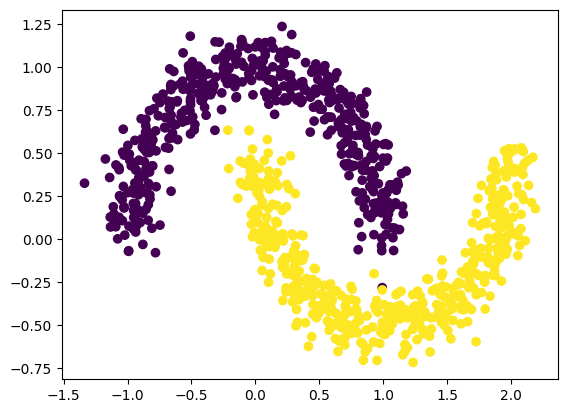

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np

dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
dataset['train_label'] = torch.from_numpy(train_label)
dataset['test_label'] = torch.from_numpy(test_label)

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:])

In [3]:
import pandas as pd

from datasetsforecast.m3 import M3

from utilsforecast.losses import mae, smape
from utilsforecast.evaluation import evaluate

from neuralforecast import NeuralForecast
from neuralforecast.models import KAN, MLP, NBEATS

In [4]:
Y_df, *_ = M3.load("./data", "Monthly")

100%|██████████| 1.76M/1.76M [00:01<00:00, 1.57MiB/s]
INFO:datasetsforecast.utils:Successfully downloaded M3C.xls, 1757696, bytes.
/Users/zhangxiaoyu/miniconda3/envs/pykan/lib/python3.10/site-packages/datasetsforecast/m3.py:108: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(class_group.freq)


In [5]:
horizon = 18

test_df = Y_df.groupby('unique_id').tail(horizon)
train_df = Y_df.drop(test_df.index).reset_index(drop=True)

In [6]:
models = [
    KAN(input_size=2*horizon,
        h=horizon,
        scaler_type='robust',
        max_steps=1000,
        early_stop_patience_steps=3),
    MLP(input_size=2*horizon,
        h=horizon,
        scaler_type='robust',
        max_steps=1000,
        early_stop_patience_steps=3),
    NBEATS(input_size=2*horizon,
           h=horizon,
           scaler_type='robust',
           max_steps=1000,
           early_stop_patience_steps=3)
]

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:lightning_fabric.utilities.seed:Seed set to 1


In [7]:
nf = NeuralForecast(models=models, freq='M')

nf.fit(train_df, val_size=horizon)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | layers       | ModuleList    | 276 K  | train
-------------------------------------------------------
276 K     Trainable params
0         Non-trainable params
276 K     Total params
1.106     Total estimated model params size (MB)


Epoch 17:  78%|███████▊  | 35/45 [00:05<00:01,  6.65it/s, v_num=0, train_loss_step=6.570, train_loss_epoch=9.770, valid_loss=690.0]


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | mlp          | ModuleList    | 1.1 M  | train
4 | out          | Linear        | 18.4 K | train
-------------------------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.424     Total estimated model params size (MB)


Epoch 22:  22%|██▏       | 10/45 [00:00<00:01, 24.67it/s, v_num=1, train_loss_step=5.260, train_loss_epoch=10.40, valid_loss=669.0]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 22:  22%|██▏       | 10/45 [00:00<00:01, 24.59it/s, v_num=1, train_loss_step=5.260, train_loss_epoch=10.40, valid_loss=669.0]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.5 M  | train
-------------------------------------------------------
2.5 M     Trainable params
2.0 K     Non-trainable params
2.5 M     Total params
9.954     Total estimated model params size (MB)



Epoch 22:  22%|██▏       | 10/45 [00:00<00:02, 15.54it/s, v_num=2, train_loss_step=4.920, train_loss_epoch=10.20, valid_loss=652.0]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 22:  22%|██▏       | 10/45 [00:00<00:02, 15.50it/s, v_num=2, train_loss_step=4.920, train_loss_epoch=10.20, valid_loss=652.0]


In [8]:
preds = nf.predict()

preds = preds.reset_index()

test_df = pd.merge(test_df, preds, 'left', ['ds', 'unique_id'])

/Users/zhangxiaoyu/miniconda3/envs/pykan/lib/python3.10/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/zhangxiaoyu/miniconda3/envs/pykan/lib/python3.10/site-packages/utilsforecast/processing.py:438: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 45/45 [00:00<00:00, 164.36it/s]

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 45/45 [00:00<00:00, 401.00it/s]


INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 45/45 [00:00<00:00, 262.89it/s]


/Users/zhangxiaoyu/miniconda3/envs/pykan/lib/python3.10/site-packages/neuralforecast/core.py:209: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [9]:
evaluation = evaluate(
    test_df,
    metrics=[mae, smape],
    models=["KAN", "MLP", "NBEATS"],
    target_col="y",
)

evaluation = evaluation.drop(['unique_id'], axis=1).groupby('metric').mean().reset_index()
evaluation

,metric,KAN,MLP,NBEATS
0,mae,676.434964,645.031436,643.411196
1,smape,0.075452,0.071420,0.072093
